# Figure 1: del Molino et al, eLife 2017

This is a reproduction of del Molino et al. 2017 using NeuroML2/LEMS


## Microcircuit Conenctivity

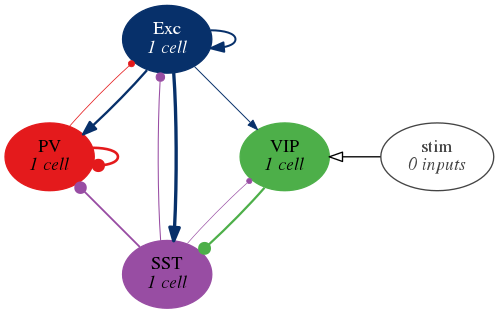

In [1]:
from IPython.display import Image
Image("../NeuroML/Fig1/Fig1a.png")

In [2]:
populations = ['e', 'pv', 'sst', 'vip']
colours = ['blue', 'red', 'darkorchid', 'green']

## Low Baseline Activity

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Reloading: Data loaded from ./rates_low.dat (jNeuroML)


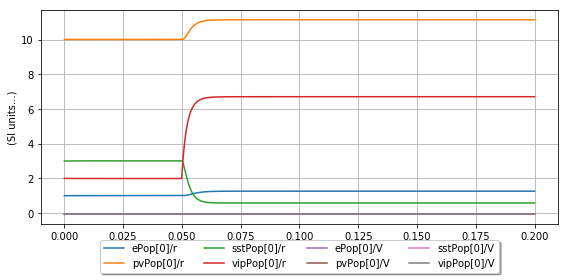

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml

low_lems_file='../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml'
low_results = pynml.run_lems_with_jneuroml(low_lems_file, nogui=True, load_saved_data=True, plot=True)

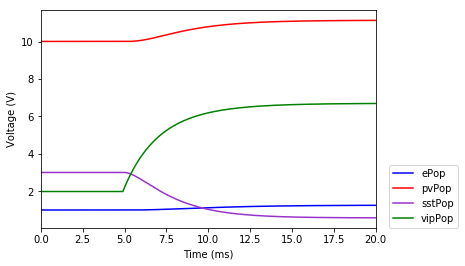

In [4]:
# reproduce Fig 1c - Low Baseline activity

# t=0 corresponds to the time point of the modulatory input
T = max(low_results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in low_results['t']]
for population_idx, population in enumerate(populations):
    pop = '%sPop' %population
    plt.plot(timeLine, low_results[pop + '[0]/r'], label=pop, color=colours[population_idx])

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

## High Baseline Activity

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_high_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_high_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Reloading: Data loaded from ./rates_high.dat (jNeuroML)


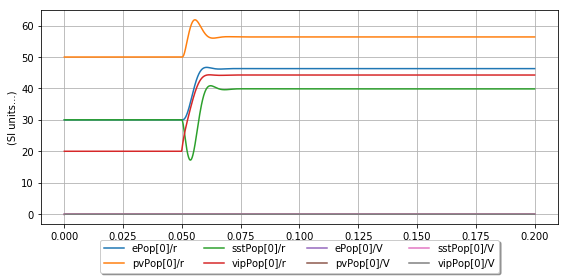

In [5]:
high_lems_file='../NeuroML/Fig1/LEMS_RateBased_high_baseline.xml'
high_results = pynml.run_lems_with_jneuroml(high_lems_file, nogui=True, load_saved_data=True, plot=True)

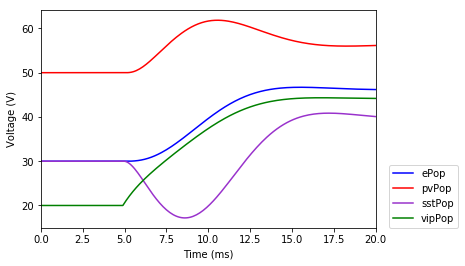

In [6]:
# reproduce Fig 1c - Low Baseline activity

# t=0 corresponds to the time point of the modulatory input
T = max(high_results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in high_results['t']]
for population_idx, population in enumerate(populations):
    pop = '%sPop' %population
    plt.plot(timeLine, high_results[pop + '[0]/r'], label=pop, color=colours[population_idx])

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

## f-I Curve

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig2/LEMS_fISim_e.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig2/LEMS_fISim_e.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Removing file ./fI_e.dat after having loading its data!
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Removing file ./rates_low.dat after having loading its data!

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig2/LEMS_fISim_pv.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig2/LEMS_fISim_pv.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Removing file ./fI_pv.dat after having loading its data!
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBase

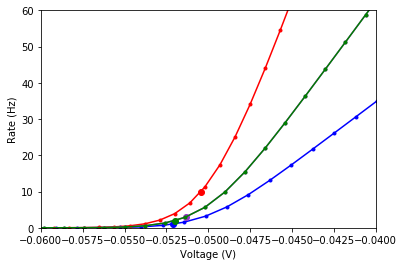

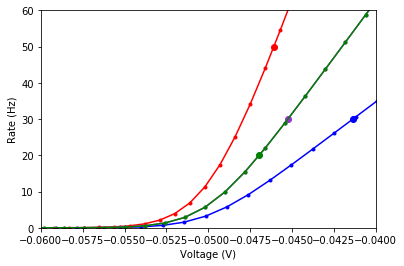

In [44]:
import numpy as np
n_units = 20
baselines = ['low', 'high']

r = {}
v = {}
for baseline in baselines:
    plt.figure()
    for population_idx, population in enumerate(populations):
        lems_file = '../NeuroML/Fig2/LEMS_fISim_%s.xml' %population
        # Run simulation
        # cleanup: remove the .dat file after loading them
        results = pynml.run_lems_with_jneuroml(lems_file, nogui=True, load_saved_data=True,
                                               cleanup=True)
        # get the last values of the simulation and plot the fI Curve

        r[population] = np.zeros((n_units))
        v[population] = np.zeros((n_units))
        for unit in range(n_units):
            pop_unit_r = '%sPop[%d]/r' %(population, unit)
            pop_unit_V = '%sPop[%d]/V' %(population, unit)
            r[population][unit] = results[pop_unit_r][-1]
            v[population][unit] = results[pop_unit_V][-1]

        plt.plot(v[population], r[population], marker='.', color=colours[population_idx])

        # load the low_baseline results and plot them on the fI curve
        baseline_lems = '../NeuroML/Fig1/LEMS_RateBased_%s_baseline.xml' %baseline
        results_baseline = pynml.run_lems_with_jneuroml(baseline_lems, nogui=True, load_saved_data=True, 
                                                        cleanup=True)
        population_v = '%sPop[0]/V' %population
        population_r = '%sPop[0]/r' %population
        # Note: I am taking the first time point as at time point 0 the membrane voltage has not yet reached the baseline
        #  activity steady-state
        plt.plot(results_baseline[population_v][1], results_baseline[population_r][1], 'o', color=colours[population_idx])
        print('')

        plt.xlabel('Voltage (V)')
        plt.ylabel('Rate (Hz)')
        plt.xlim(-.060, -.040)
        plt.ylim(0, 60)
        plot_name = 'fI_%s_baseline.png' %baseline

In [41]:
lems_low_file = '../NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml'
lems_high_file = '../NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml'

results_low = pynml.run_lems_with_jneuroml(lems_low_file, nogui=True, load_saved_data=True,
                                               cleanup=True)
results_high = pynml.run_lems_with_jneuroml(lems_high_file, nogui=True, load_saved_data=True,
                                               cleanup=True)

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Removing file ./Population_e_low_baseline.dat after having loading its data!
pyNeuroML >>> Removing file ./Population_pv_low_baseline.dat after having loading its data!
pyNeuroML >>> Removing file ./Population_sst_low_baseline.dat after having loading its data!
pyNeuroML >>> Removing file ./Population_vip_low_baseline.dat after having loading its data!
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Removing file ./Population_e_high_baseline.dat after having loading its data!
pyNeuroML >>> Removing 

ePop[0]/r 2.4491231 46.997074
ePop[1]/r 2.2993894 10.149194
ePop[2]/r 1.493407 19.527674
ePop[3]/r 1.5528684 13.664153
ePop[4]/r 1.4313402 19.929373
ePop[5]/r 2.3755026 23.113283
ePop[6]/r 1.9147863 34.505856
ePop[7]/r 3.1915157 24.71055
ePop[8]/r 1.4680107 30.42804
ePop[9]/r 1.9317522 36.256306
ePop[10]/r 3.136122 11.110783
ePop[11]/r 2.4605255 2.9490063
ePop[12]/r 2.3833888 21.504234
ePop[13]/r 1.9726989 14.506805
ePop[14]/r 2.1501915 6.8298125
ePop[15]/r 1.6132976 75.00177
pvPop[0]/r 12.44329 178.4059
pvPop[1]/r 16.96849 14.766378
pvPop[2]/r 13.811466 29.45627
pvPop[3]/r 11.128165 2.7616403
pvPop[4]/r 12.362385 44.17875
pvPop[5]/r 9.132827 220.02802
pvPop[6]/r 9.163018 53.470608
pvPop[7]/r 11.015811 303.12842
pvPop[8]/r 14.751726 28.038979
pvPop[9]/r 8.955828 17.314693
pvPop[10]/r 12.540883 95.23099
pvPop[11]/r 14.586512 191.58823
pvPop[12]/r 12.798165 1.1060675
pvPop[13]/r 17.95277 14.502722
sstPop[0]/r 0.58483255 0.00021553985
sstPop[1]/r 1.5895371 3.6527684
sstPop[2]/r 3.3262262 

Text(0,0.5,'High Baseline (Hz)')

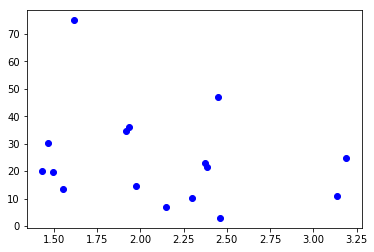

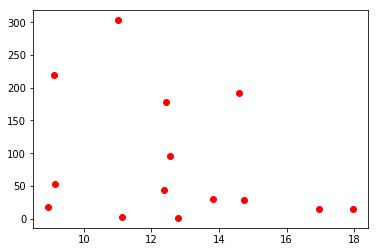

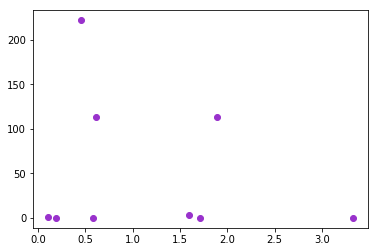

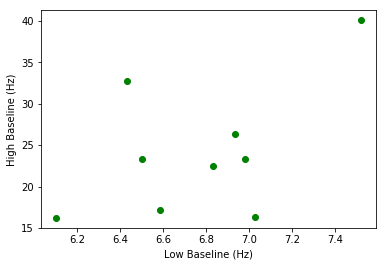

In [42]:
n_pops = [16, 14, 9, 9]
units = ['e', 'pv', 'sst', 'vip']
population_idx = 0
for pop_idx, pop in enumerate(units):
    plt.figure()
    for n_pop in range(n_pops[pop_idx]):
        pop_unit = '%sPop[%d]/r' %(pop, n_pop) 
        plt.plot(results_low[pop_unit][-1], results_high[pop_unit][-1], 'o', color=colours[pop_idx])
    
plt.xlabel('Low Baseline (Hz)')
plt.ylabel('High Baseline (Hz)')